In [9]:
pip install powerlaw


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


A trusted reference sequence is to be inserted into the "RefSeq" folder

In [7]:
seq_file_path = "/absolute/path/to/Documents/Numbering_Scheme/RefSeq/seq_ref_tem-1.fasta"
print(seq_file_path)

/absolute/path/to/Documents/Numbering_Scheme/RefSeq/seq_ref_tem-1.fasta


In [8]:
import subprocess

# Run HMMER to search for hits in your sequence, Profile_HMM.hmm file will be aligned to
# seq_ref_tem_1.fasta file, out of this alignment the TEM-1_numbering.txt file will be created.
hmmsearch_cmd = ['hmmsearch', '-E', '0.01', '--domE', '0.01', 
                 '-o', './Documents/Numbering_Scheme/numbering/TEM-1_numbering.txt',
                 './Documents/HMM/Profile_HMM.hmm',
                 './Documents/Numbering_Scheme/RefSeq/seq_ref_tem_1.fasta']
subprocess.run(hmmsearch_cmd, check=True)

# Read in the output file and print it out
with open('./Documents/Numbering_Scheme/numbering/TEM-1_numbering.txt', 'r') as f:
    print(f.read())

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3 (Nov 2019); http://hmmer.org/
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ./Documents/HMM/Profile_HMM.hmm
# target sequence database:        ./Documents/Numbering_Scheme/RefSeq/seq_ref_tem_1.fasta
# output directed to file:         ./Documents/Numbering_Scheme/numbering/TEM-1_numbering.txt
# sequence reporting threshold:    E-value <= 0.01
# domain reporting threshold:      E-value <= 0.01
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       Profile_HMM  [M=286]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence                                             Description
    --

In [9]:
from modules.number_extractor import extract_profile_hmm

# The numbering will be bounded to the profile HMM, the count will be always from 1-263 
# amino acids in this case

input_file = './Documents/Numbering_Scheme/numbering/TEM-1_numbering.txt'
output_file = './Documents/Numbering_Scheme/numbering/amino_acid_number.csv'
prefix_str = "Profile_HMM"

df = extract_profile_hmm(input_file, output_file, prefix_str)
print(df)


     amino_acid_number Profile_HMM
0                    1           H
1                    2           P
2                    3           E
3                    4           T
4                    5           L
5                    6           V
6                    7           K
7                    8           V
8                    9           K
9                   10           D
10                  11           A
11                  12           E
12                  13           D
13                  14           K
14                  15           L
15                  16           G
16                  17           A
17                  18           R
18                  19           V
19                  20           G
20                  21           Y
21                  22           I
22                  23           E
23                  24           L
24                  25           D
25                  26           L
26                  27           N
27                  

In [2]:
from modules.Fastamerge import merge_fasta_files

input_dir = "./test/testnetwork/"
output_file = "./Documents/TEM-merged.fasta"

merge_fasta_files(input_dir, output_file)

In [1]:
from modules.fasta_parser import parse_fasta
import pandas as pd

# Uploade all of the query sequences

fasta_file = './test/non_identical.fasta'
parse_fa = parse_fasta(fasta_file)
parse_fa = parse_fa.reset_index(drop=True)

#print(parse_fa)

/home/maxim/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Insperct and remove manually all signal peptides

parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVALIPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVALIPFFAAFCFPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('DPQHFRVALIPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVALIPFLAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVARRPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIKHFRVALIPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVSLIPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('QHFRVALIPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVALFPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVALIPFFAAFCLHVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVTLIPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVTLIPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVALIPFFAAFCLPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQHFRVALIPFFAAFCIPVFA', '')
parse_fa['amino_acid_sequence'] = parse_fa['amino_acid_sequence'].str.replace('MSIQQYFRVALIPFFAAFCLPVFA', '')


import pandas as pd

# Find the indices of the rows with the specified names
names_to_keep = ['TEM-1', 'TEM-116', 'TEM-171', 'TEM-181']
keep_indices = parse_fa[parse_fa['name'].isin(names_to_keep)].index

# Mark duplicates in the 'amino_acid_sequence' column, but keep the ones with the specified names
duplicates_mask = parse_fa.duplicated(subset='amino_acid_sequence', keep=False)
duplicates_mask[keep_indices] = False

# Apply the mask to the original DataFrame
unique_df = parse_fa[~duplicates_mask]
unique_df = unique_df.reset_index(drop=True)
print(unique_df)



          name                                amino_acid_sequence
0      TEM-195  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...
1      TEM-163  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...
2        TEM-9  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...
3       TEM-39  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMLST...
4      TEM-211  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...
...        ...                                                ...
5746  ANG15461  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...
5747  ANG27513  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...
5748  ANG27339  HPETLVKVKDAEDQLGARVGYIELDLNSGKVLESFRPEERFPMMST...
5749  ANG31338  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...
5750  ANG12435  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...

[5751 rows x 2 columns]


In [ ]:
# import tempfile
import subprocess

# aligne all query sequences to the profile HMM 

for index, row in unique_df.iterrows():
    # create a temporary file for the sequence in FASTA format
    with tempfile.NamedTemporaryFile(mode='w', delete=False) as tmpfile:
        tmpfile.write(f'>seq{index}\n{row["amino_acid_sequence"]}\n')
        tmpfile.flush()

        # run hmmsearch on the temporary file
        hmmsearch_cmd = ['hmmsearch', '-E', '0.01', '--domE', '0.01', '-o',
                         f'./Documents/Numbering_Scheme/numbering/TEM-sequences_{index}.txt',
                         './Documents/HMM/Profile_HMM.hmm',tmpfile.name]
        result = subprocess.run(hmmsearch_cmd, capture_output=True, check=True)
        print(result.stdout.decode())

    # print the output file
    # print the output file
    with open(f'./Documents/Numbering_Scheme/numbering/TEM-sequences_{index}.txt', 'r') as f:
        print(f.read())

This entire next step, is used to extract using regex all "start" and "end" positions 
including the sequences. It uses X and Y coordinates in a way to follow the amino acids
and the numbering

In [4]:
import re
import pandas as pd
import glob

# create an empty DataFrame to store the sequences
df_sequences = pd.DataFrame(columns=["seq_id", "start_pos", "sequence", "end_pos"])

# loop over files in the current directory that match the naming pattern
filepaths = glob.glob("./Documents/Numbering_Scheme/numbering/TEM-sequences_*.txt")
filepaths = sorted(filepaths, key=lambda x: int(re.findall(r'\d+', x)[0]))

# loop over the filepaths
for i, filepath in enumerate(filepaths):
    # extract the index from the filename
    index = int(re.search(r"TEM-sequences_(\d+)\.txt", filepath).group(1))
    # open the file and read its contents
    with open(filepath, "r") as f:
        contents = f.read()
    # find matches using a regular expression pattern
    pattern = r"(Profile_HMM)\s+(\d+)\s+([\w\.]+)\s+(\d+)"
    matches = re.findall(pattern, contents)
    
    #print(f"File {i}: {filepath}")
    #print(f"Matches: {matches}")

    # store the sequences in a list
    sequences = []
    for match in matches:
        if match[0] == "Profile_HMM":
            seq_id = match[0]
            start_pos = int(match[1])
            seq = match[2].replace(".", "").upper()
            end_pos = int(match[3])
            sequences.append((seq_id, start_pos, seq, end_pos))

    # convert the list of sequences to a DataFrame and add it to the main DataFrame
    df = pd.DataFrame(sequences, columns=["seq_id", "start_pos", "sequence", "end_pos"])
    # set the index for this sequence to start at 0
    df.index -= df.index.min()
    # add the sequence to the main DataFrame
    df_sequences = pd.concat([df_sequences, df], ignore_index=True)

# display the resulting DataFrame
#print(df_sequences)


In [5]:
import pandas as pd
import glob
import re

# create an empty DataFrame to store the sequences
df_seq = pd.DataFrame(columns=["seq_id", "start_pos", "sequence", "end_pos"])

# loop over files in the current directory that match the naming pattern
filepaths = glob.glob("./Documents/Numbering_Scheme/numbering/TEM-sequences_*.txt")
filepaths = sorted(filepaths, key=lambda x: int(re.findall(r'\d+', x)[0]))

# loop over the filepaths
for i, filepath in enumerate(filepaths):
    # extract the index from the filename
    index = int(re.search(r"TEM-sequences_(\d+)\.txt", filepath).group(1))
    # open the file and read its contents
    with open(filepath, "r") as f:
        contents = f.read()
    # find matches using a regular expression pattern
    pattern = r"(seq\d+|Profile_HMM)\s+(\d+)\s+([\w\.]+)\s+(\d+)"
    matches = re.findall(pattern, contents)

    # store the sequences in a list
    sequences = []
    for match in matches:
        if match[0].startswith("seq"):
            seq_id = int(match[0].replace("seq", ""))
            start_pos = int(match[1])
            seq = match[2].replace(".", "").upper()
            end_pos = int(match[3])
            sequences.append((seq_id, start_pos, seq, end_pos))

    # convert the list of sequences to a DataFrame and add it to the main DataFrame
    df = pd.DataFrame(sequences, columns=["seq_id", "start_pos", "sequence", "end_pos"])
    # set the index for this sequence to start at 0
    df.index -= df.index.min()
    # add the sequence to the main DataFrame
    df_seq = pd.concat([df_seq, df], ignore_index=True)

# save the resulting DataFrame to a CSV file
#df_seq.to_csv("sequences.csv", index=False)

# display the resulting DataFrame
#print(df_seq)


In [6]:
df_combined_prenum = pd.merge(df_seq, df_sequences, left_index=True, right_index=True)
#print(df_combined_prenum)

In [7]:
df_x = df_combined_prenum[['seq_id_x', 'start_pos_x', 'sequence_x', 'end_pos_x']]
df_y = df_combined_prenum[['seq_id_y', 'start_pos_y', 'sequence_y', 'end_pos_y']]
#print(df_x)
#print(df_y)

In [8]:
df_combined_prenum1 = df_combined_prenum.drop(['sequence_x', 'sequence_y'], axis=1)
#print(df_combined_prenum1)

In [9]:
df_grouped = df_combined_prenum.groupby(['seq_id_x', 'seq_id_y']).agg({
    'start_pos_x': 'first', 
    'end_pos_x': 'last', 
    'start_pos_y': 'first', 
    'end_pos_y': 'last'
}).reset_index()

#print(df_grouped)

In [10]:
df_start_end_x = df_grouped.loc[:, ['seq_id_x', 'start_pos_x', 'end_pos_x']]
#print(df_start_end_x)

In [11]:
df_start_end_y = df_grouped.loc[:, ['seq_id_y', 'start_pos_y', 'end_pos_y']]
#print(df_start_end_y)

In [12]:
import pandas as pd

# Define df_start_end_x and df_x here

collapsed_seq_x = df_x.groupby('seq_id_x')['sequence_x'].agg(''.join).reset_index()
merged_df_x = pd.merge(df_start_end_x, collapsed_seq_x, on='seq_id_x')

# Replace the first row of sequence_x column with first_sequence
first_sequence = merged_df_x.loc[0, "sequence_x"]
merged_df_x.loc[0, "sequence_x"] = first_sequence

# Print the final merged dataframe
#print(merged_df_x)

In [13]:
df_start_end_y['sequence_y'] = merged_df_x.loc[df_start_end_y.index, 'sequence_x'].values
#print(df_start_end_y)

In [14]:
# Loop through each row in df_start_end_y and create a new DataFrame for each one
for index, row in df_start_end_y.iterrows():
    sequence_y = list(row['sequence_y'])
    amino_acid_number = []
    count = row['start_pos_y']
    
    for char in sequence_y:
        if char != '-':
            amino_acid_number.append(count)
            count += 1
        else:
            amino_acid_number.append(None)
    
    HMM_col = pd.DataFrame({
        'amino_acid_number': amino_acid_number,
        'Profile_HMM': sequence_y
    })

    # Save the new DataFrame to a CSV file
    filename = f'./Documents/Numbering_Scheme/numbering/Profile_HMM_{index}.csv'
    HMM_col.to_csv(filename, index=True)

In [15]:
# Loop through each row in merged_df_x and create a new DataFrame for each one
for index, row in merged_df_x.iterrows():
    sequence_x = list(row['sequence_x'])
    new_count = []
    count = row['start_pos_x']
    
    for char in sequence_x:
        if char != '-':
            new_count.append(count)
            count += 1
        else:
            new_count.append(None)
    
    seq_col = pd.DataFrame({
        'new_count': new_count,
        'Profile_HMM': sequence_x
    })

    # Save the new DataFrame to a CSV file
    filename = f'./Documents/Numbering_Scheme/numbering/seq_{index}.csv'
    seq_col.to_csv(filename, index=True)


The next cell shows the core of the Numbering Scheme, here the numbering from the 
reference sequence is taken. It is aligned to the profile HMM and the query sequences,
the umbering bounds every query sequence in such a way so that it is aligned to the Profile 
HMM but also bounded to the numbering from 1 to 263.


In [16]:
import pandas as pd
import glob
import re
import numpy as np

# Get a list of all HMM_profile CSV files in the directory that match the pattern 'HMM_profile_*.csv'
#HMM_file_list = glob.glob('./Documents/Numbering_Scheme/numbering/Profile_HMM_*.csv')
HMM_file_list = sorted(glob.glob('./Documents/Profile_HMM_*.csv'), key=lambda x: int(re.findall(r'\d+', x)[0]))

# Get a list of all seq CSV files in the directory that match the pattern 'seq_*.csv'
#seq_file_list = glob.glob('./Documents/Numbering_Scheme/numbering/seq_*.csv')
seq_file_list = sorted(glob.glob('./Documents/seq_*.csv'), key=lambda x: int(re.findall(r'\d+', x)[0]))

# Read in the amino acid number DataFrame
amino_acid_number = pd.read_csv('./nucleotide_number.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Define the renumber_index function
def renumber_index(row):
    global counter
    global counternew
    new_index = 0
    if row['Profile_HMM'] == '-' and row['Profile_HMM_x'] == '-':
        new_index = ''
    elif row['Profile_HMM'] == '-' or row['Profile_HMM_x'] == '-':
        counternew += 1
        new_index = f"{counter}.{counternew}"
    else:
        counter += 1
        counternew = 0
        new_index = counter
    return new_index

# Iterate over the sorted lists of HMM_profile and seq CSV files
for i in range(len(HMM_file_list)):
    # Initialize the counters
    counter = 0
    counternew = 0

    # Read in the HMM_profile file
    Profile_HMM = pd.read_csv(HMM_file_list[i])
    Profile_HMM = Profile_HMM.iloc[:, :3]  # Keep only the first three columns
    # Read in the corresponding seq file
    seq_file = pd.read_csv(seq_file_list[i])
    seq_file = seq_file.iloc[:, :3]  # Keep only the first three columns
    # Merge the HMM_profile and seq DataFrames on the 'Unnamed: 0' column
    merged_df = pd.merge(Profile_HMM, seq_file, on='Unnamed: 0')

    # Merge the resulting DataFrame with the 'amino_acid_number' DataFrame on the 'amino_acid_number' column
    final_df = pd.merge(merged_df, amino_acid_number, on='amino_acid_number', how='outer')
    #print(final_df)
    # Sort the merged DataFrame by the 'amino_acid_number' column to maintain the original order
    final_df = final_df.sort_values(by='amino_acid_number')

    # Reset the index and drop the old index column
    final_df = final_df.reset_index(drop=True)
    #print(final_df)
    # Drop unnecessary columns
    final_clear_df = final_df.drop(columns=['Unnamed: 0'])
    #print(final_clear_df)
    
    # Fill NaN values with '-'
    # Find the minimum value in amino_acid_number that is greater than 0
    min_amino_acid_number = final_clear_df[final_clear_df['amino_acid_number'] > 0]['amino_acid_number'].min()

    # Fill the gaps for missing amino_acid_number values with '-' in the Profile_HMM_x column
    for i in range(1, min_amino_acid_number):
        final_clear_df.loc[final_clear_df['amino_acid_number'] == i, 'Profile_HMM_x'] = '-'

    # Fill the remaining NaN values in the Profile_HMM_x column with '-'
    final_clear_df['Profile_HMM_x'].fillna('-', inplace=True)


    #print(final_clear_df)
    # Convert all numeric columns to integers
    for col in final_clear_df.columns:
        if final_clear_df[col].dtype.kind in 'bifc':
            final_clear_df[col] = final_clear_df[col].fillna(0).astype(np.int64)
            #print(final_clear_df)
        # Apply the renumber_index function to final_clear_df
    final_clear_df['standard_numbering'] = final_clear_df.apply(renumber_index, axis=1)
    #print(final_clear_df)


    final_clear_df['standard_numbering'] = pd.to_numeric(final_clear_df['standard_numbering'], errors='coerce')
    print(final_clear_df)

    # Select rows with full round integer standard numbering
    # Extract the DNA sequences from the Profile_HMM_x column
    sequences = final_clear_df['Profile_HMM_x']
    #print(sequences)
    
    # Create a new dataframe with the selected sequences
    new_df = pd.DataFrame({'sequences': sequences})
    #print(new_df)
    
    #with open("./sequences_new_df.txt", "a") as f:
            #print(new_df, file=f)
        
    # create dataframe
    df = pd.DataFrame({'sequences': sequences})
    #print(df)
    # concatenate sequences into a single string
    sequence_string = ''.join(new_df['sequences'])
    #print(sequence_string)
    with open("./Documents/sequence_string.txt", "a") as f:
            print(sequence_string, file=f)

In [3]:
# Merge all of the data from the curated database with the numbered sequences

import pandas as pd
nucleotide_sequence_cluser = pd.read_csv('./Documents/Numbering_Scheme/numbering/sequence_string.txt', sep=' ',header=None)
nucleotide_sequence_cluser.columns = ['amino_acid_sequence_numbered']


In [4]:
import pandas as pd

# assuming nucleotide_sequence_cluser and unique_df are defined
nucleotide_sequence_cluster = pd.DataFrame(nucleotide_sequence_cluser)
#parse_fa1 = pd.DataFrame(parse_fa1)

# merge the two dataframes
merged_df = nucleotide_sequence_cluster.merge(unique_df, left_index=True, right_index=True)

# add a column named "phenotype" to the merged dataframe
merged_df["phenotype"] = "unknown"

# save the merged dataframe to a CSV file
merged_df.to_csv("merged_data.csv", index=False)

In [17]:
import pandas as pd

# Read the CSV file and store it in a DataFrame
merged_df = pd.read_csv('merged_data .csv')
merged_df = merged_df.head(2000)
# Display the first few rows of the DataFrame


In [18]:
# Removing the TEM and leaving only the numbers
def process_name(value):
    if value.startswith("TEM-"):
        return value.split('-')[1]
    else:
        return ""

# Apply the custom function to the 'name' column
merged_df['name'] = merged_df['name'].apply(process_name)

print(merged_df)

                           amino_acid_sequence_numbered name  \
0     HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...  195   
1     HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...  163   
2     HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...    9   
3     HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMLST...   39   
4     HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...  211   
...                                                 ...  ...   
1995  HPETLAKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...        
1996  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...        
1997  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...        
1998  HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...        
1999  HPETLVKVKDAEDQLGARVGYIELDLSSGKILESFRPEERFPLMST...        

                                    amino_acid_sequence phenotype  
0     HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...   unknown  
1     HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMST...   unknown  
2     HPETLVKVKDAEDQLGARVGY

In [19]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to calculate the number of mismatches between two sequences
def calculate_distance(seq1, seq2, max_mismatches):
    num_mismatches = sum(1 for a, b in zip(seq1, seq2) if a != b)
    if num_mismatches <= max_mismatches:
        return num_mismatches
    else:
        return 0

In [20]:
# Define a function to build the distance matrix
def build_distance_matrix(merged_df, max_mismatches):
    num_seqs = len(merged_df)
    distance_matrix = np.zeros((num_seqs, num_seqs))

    for i in range(num_seqs):
        for j in range(i, num_seqs):
            seq1 = merged_df.iloc[i]['amino_acid_sequence_numbered']
            seq2 = merged_df.iloc[j]['amino_acid_sequence_numbered']
            distance = calculate_distance(seq1, seq2, max_mismatches)
            
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance

    return distance_matrix

In [21]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

max_mismatches = 1
distance_matrix = build_distance_matrix(merged_df, max_mismatches)

# Define a dictionary to map phenotype values to specific colors
phenotype_color_map = {
    '2b': 'green',
    '2be': 'blue',
    '2br': 'red',
    '2ber': 'pink',
    'unknown': 'gray',
}

# Get the phenotype colors for each sequence
merged_df['color'] = merged_df['phenotype'].apply(lambda x: phenotype_color_map[x])

# Create graph and add edges based on distance matrix
G = nx.Graph()
for i, id in enumerate(merged_df['name']):
    G.add_node(i, color=merged_df.iloc[i]['color'], label=id, font_size=5)

for i in range(len(merged_df)):
    for j in range(i+1, len(merged_df)):
        weight = distance_matrix[i][j]
        if weight > 0:
            G.add_edge(i, j, weight=weight)
            
# Get nodes with degree > 0
nodes_with_degree = [n for n, degree in dict(G.degree()).items() if degree > 0]

# Create subgraph with nodes that have degree > 0
subG = G.subgraph(nodes_with_degree)

# Set figure size
plt.figure(figsize=(150, 150))

# Use the API below for the neworkx guidance
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

# Visualize subgraph
seed = 16

pos = nx.spring_layout(subG, k=0.15, iterations=100, scale=1, seed=seed)
nx.draw_networkx_nodes(subG, pos, node_color=[subG.nodes[n]['color'] for n in subG.nodes], node_size=500)
nx.draw_networkx_edges(subG, pos, width=1, alpha=1)
smaller_labels = {i: merged_df.iloc[i]['name'] for i in nodes_with_degree}
nx.draw_networkx_labels(subG, pos, smaller_labels, font_size=5)

output_filename = "2000.png"
plt.savefig(output_filename, format="png", dpi=150)

plt.close()

<ipython-input-22-6742a441051e>:36: RuntimeWarning: divide by zero encountered in power
  fitted_power_law = lambda x: np.exp(popt[0]) * np.power(x, popt[1])


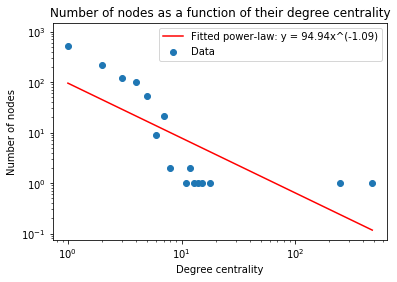

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import Counter
from scipy.optimize import curve_fit

# Assuming you already have the graph 'G'

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)
degrees = [int(round(dc * (len(G)-1))) for dc in degree_centrality.values()]

# Count the number of nodes for each degree centrality
degree_counts = Counter(degrees)

# Define a function for the power-law fitting in log-log space
def linear_func(x, a, b):
    return a + b * x

# Fit the power-law function to the log-transformed data
x = np.array(sorted(list(degree_counts.keys())))
y = np.array([degree_counts[d] for d in x])

# Filter out zero values in x and y
non_zero_indices = (x > 0) & (y > 0)
x_filtered = x[non_zero_indices]
y_filtered = y[non_zero_indices]

log_x = np.log(x_filtered)
log_y = np.log(y_filtered)

# Use Levenberg-Marquardt algorithm for curve fitting
popt, _ = curve_fit(linear_func, log_x, log_y, method='lm')

# Calculate the fitted power-law function using the log-transformed parameters
fitted_power_law = lambda x: np.exp(popt[0]) * np.power(x, popt[1])

# Plot the scatter plot and the fitted power-law function
plt.scatter(x, y, label='Data')
plt.plot(x, fitted_power_law(x), 'r-', label=f'Fitted power-law: y = {np.exp(popt[0]):.2f}x^({popt[1]:.2f})')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.legend()
plt.title('Number of nodes as a function of their degree centrality')

# Save the output as a PNG file
plt.savefig('2000g.png', dpi=150)

plt.show()
